# Assignment 2

This assignment will give you a glimpse of the basics of machine learning. While this assignment will not directly tie into recommendation systems (since it's important to cover basics first), it will give you a feel for how the machine learning pipeline works: data pre-processing, trying different models, and lastly evaluating.

Before we get started, let's import a few important libraries:

In [1]:
import sklearn
import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

In this assignment, you will be classifying Iris plants by the lengths of its flower parts (sepals and petals). An iris plant is shown below:
![image.png](https://www.gardendesign.com/pictures/images/900x705Max/site_3/iris-cristata-dwarf-crested-iris-purple-flower-shutterstock-com_12594.jpg)

In [2]:
# Load the dataset
from sklearn.datasets import load_iris

data = load_iris()
inputs = pd.DataFrame(data.data, columns = ['Sepal Length','Sepal Width','Petal Length', 'Petal Width'])
targets = pd.DataFrame(data.target, columns= ['Flower Type'])

# Notice the shapes of the inputs and targets below
print(inputs.shape)
print(targets.shape)

(150, 4)
(150, 1)


**QUESTION**: How many input features are there?

**ANSWER**: ___4___

**QUESTION**: How many training examples are there?

**ANSWER**: ___150___

Now, let's take a look at the dataset. In the cell above, notice that we take the inputs and outputs and put them into a Pandas DataFrame. Dataframes are almost like mini-Excel spreadsheets, and they come with a lot of in-built functions to process the data easily. For example, the `.head()` function below shows us the first few data points in each dataset.

In [3]:
inputs.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
targets.head()

,Flower Type
0,0
1,0
2,0
3,0
4,0


Notice that the flower type for the first few rows are all the same. This is because the dataset is not shuffled. In general, it is a good idea to have a shuffled dataset, so that if we take batches of data points (that are near together in the Dataframe), the model still trains without much bias.

**Task 1**: Find a NumPy function that generates a randomized list of numbers from 0 to $n-1$. For example, if $n=7$, the function would potentially return $[5,3,4,2,1,0,6]$ or $[2,6,0,3,1,5,4]$. The function should be relatively simple and be one line long. Notice that you have to also choose a correct $n$.

In [7]:
# TODO: TASK 1

random_nums = np.random.permutation(inputs.shape[0]) # TODO
print(random_nums)

# Some checks to make sure that the list you return is of the right order
assert type(random_nums) is np.ndarray, 'Your function doesn\'t seem to be from NumPy'

random_nums_list = random_nums.tolist()
assert len(random_nums_list) == inputs.shape[0], 'Your n is not correct!'
assert sorted(random_nums_list) == list(range(inputs.shape[0])), 'Your list doesn\'t have all the numbers from 0 to n-1.'

print('All checks passed!')

[ 87  83  45 123 148 115  89  71  34  86  51   6   9 145  21 119 110 149
 127 107  52  75 135  66 100   2  31  23 105  55  48 104  92  81 117  74
  60 113  67  29   3  11  90 136 138  22  39  76 116  62 112  49  69  35
 109  30  88  57  73 103  17 133  59 144 139 140 132  78  98  95  80  16
  15 124  65  37  28   0 122 129  33  36  43 121 130 134 137  12  99   5
 141 125 126  64 131  53 143  13  44  82  79  72 101  14  77  56 142  19
 106 146  61  20  70  38   1  54  26  58   8  94  40 147  42 114  97  27
  93  63 108  18  24  96 118  41  50   4  91   7  47 111 102 120  46  85
 128  25  10  68  32  84]
All checks passed!


Now that we have our randomized list, we can use the order of these numbers to dictate the order of the rows in our Dataframes:

In [8]:
inputs = inputs.loc[random_nums]
inputs.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
87,6.3,2.3,4.4,1.3
83,6.0,2.7,5.1,1.6
45,4.8,3.0,1.4,0.3
123,6.3,2.7,4.9,1.8
148,6.2,3.4,5.4,2.3


In [9]:
targets = targets.loc[random_nums]
targets.head()

,Flower Type
87,1
83,1
45,0
123,2
148,2


Above, verify that the indices (the left most column) are not sequential (not 0, 1, 2, etc.), but also verify that they match for the inputs and targets.

# Data Visualization

Now, let's take a look at the data to see how it's distributed. Before visualizing, let's split the dataset into the 3 classes, so that we can see how the different input features (e.g. sepal length) are distributed per flower type.

In [10]:
def get_inputs_targets_by_class(cls):
  idxs = targets['Flower Type'] == cls
  return inputs[idxs], targets[idxs]

inputs0, targets0 = get_inputs_targets_by_class(0)
inputs1, targets1 = get_inputs_targets_by_class(1)
inputs2, targets2 = get_inputs_targets_by_class(2)

inputs1.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
87,6.3,2.3,4.4,1.3
83,6.0,2.7,5.1,1.6
89,5.5,2.5,4.0,1.3
71,6.1,2.8,4.0,1.3
86,6.7,3.1,4.7,1.5


In [11]:
targets1.head()

,Flower Type
87,1
83,1
89,1
71,1
86,1


Now let's take a look at the feature distributions across all classes.

**TASK 2**: Using the inputs and/or targets overall, display the distribution for a specific input feature (e.g. sepal length), using a Seaborn histplot. Look up Pandas and Seaborn documentation online to complete this task.

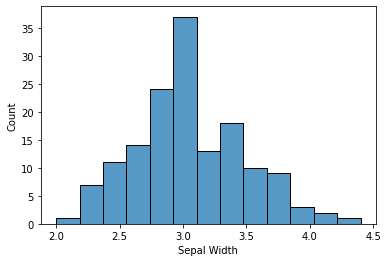

In [12]:
# TODO : TASK 2

def display_distribution_for_feature(inputs, targets, input_feature_name): # e.g. inputs, targets, 'Sepal Width'
  # From the class_inputs Dataframe, extract only the input_feature_name (i.e. the only columns visible should be the indices and the input_feature_name)
  # Look up Pandas documentation to select for a column in a DataFrame:
  features = inputs[input_feature_name] # TODO
  
  # Which plot do you use to display a histogram in Seaborn?
  sns.histplot(features) # TODO

display_distribution_for_feature(inputs, targets, 'Sepal Width')

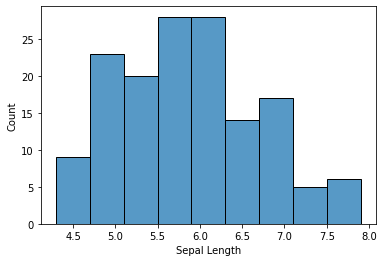

In [13]:
display_distribution_for_feature(inputs, targets, 'Sepal Length')

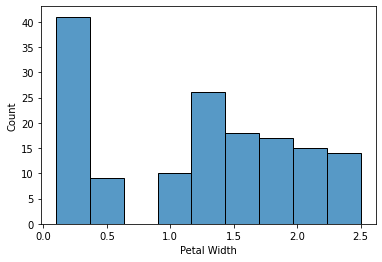

In [14]:
display_distribution_for_feature(inputs, targets, 'Petal Width')

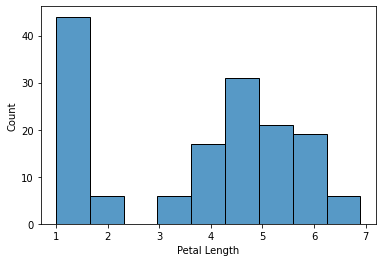

In [15]:
display_distribution_for_feature(inputs, targets, 'Petal Length')

**QUESTION**: List at least 1 trend you see for each of the input features.

*Sepal Width*: distribution centered on 3.0

*Sepal Length*: more evenly distributed centered on 6.0

*Petal Width*: mean at values less than 0.5, almost no values in between 0.0 and 1.25

*Petal Length*: mean at values less than 2, then other values distributed centered on 5 


Now, let's see how different variables are distributed together (a joint distribution, in probability terms) *by class*:

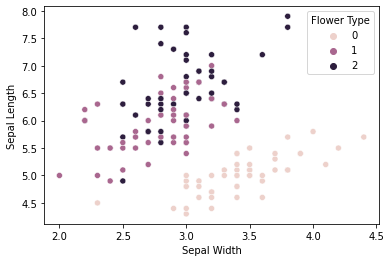

In [16]:
concatenated = inputs.copy()
concatenated['Flower Type'] = targets

sepal = sns.scatterplot(x="Sepal Width", y="Sepal Length", hue="Flower Type", data=concatenated)

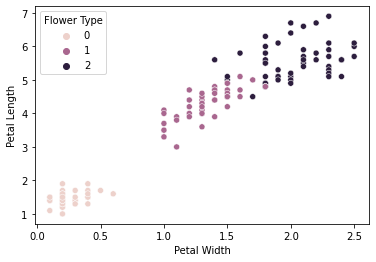

In [17]:
sepal = sns.scatterplot(x="Petal Width", y="Petal Length", hue="Flower Type", data=concatenated)

**QUESTION**: Now, what trends do you notice for the joint distributions?

*Sepal Width/Length*: small lengths, large widths -> type 0 / large lengths, small widths -> type 2

*Petal Width/Length*: small lengths, small widths -> type 0 / large lengths, large widths -> type 2


Let's take a look at how the 4 input features correlate statistically.

**TASK 3:** Write a function that finds the correlation between 2 input features in the Pandas DataFrame.

In [18]:
# TODO : TASK 3

def correlation(inputs, feature_1, feature_2): # e.g. inputs, 'Petal Length', 'Petal Width'
  """
  Hint:
  1. Select for feature_1 and feature_2 in separate variables, and convert them into Numpy arrays.
  2. Compute the mean across each feature (there is a Numpy function for this).
  3. Return the correlation coefficient (formula can be found online).
    3a. Your calculation may involve multiplications, summations, and exponentation. There are Numpy functions for all of these.
  """
  # BEGIN: YOUR SOLUTION HERE
  f1 = inputs[feature_1]
  f2 = inputs[feature_2]

  f1_mean = np.mean(f1)
  f2_mean = np.mean(f2)

  f1_diff = f1 - f1_mean
  f2_diff = f2 - f2_mean

  return np.sum(f1_diff * f2_diff) / np.sqrt(np.sum(np.power(f1_diff, 2)) * np.sum(np.power(f2_diff, 2)))
  # END: YOUR SOLUTION HERE

correlation(inputs, 'Petal Length', 'Petal Width')

0.9628654314027961

Now, let's see how each combination of input features correlate statistically:

In [19]:
from itertools import combinations

features = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width']
for comb in combinations(features, 2):
  print('Correlation between', comb[0], 'and', comb[1], '\t=', correlation(inputs, comb[0], comb[1]))

# Checks to make sure correlation(.) was implemented correctly:
def close(x, y):
  eps = 1e-3
  return abs(x - y) < eps

assert close(correlation(inputs, 'Petal Length', 'Petal Width'), 0.962865431402796), 'Correlation not implemented correctly'
assert close(correlation(inputs, 'Petal Length', 'Sepal Length'), 0.8717537758865832), 'Correlation not implemented correctly'
assert close(correlation(inputs, 'Petal Length', 'Sepal Width'), -0.42844010433053986), 'Correlation not implemented correctly'
assert close(correlation(inputs, 'Petal Width', 'Sepal Length'), 0.8179411262715753), 'Correlation not implemented correctly'
assert close(correlation(inputs, 'Petal Width', 'Sepal Width'), -0.36612593253643905), 'Correlation not implemented correctly'
assert close(correlation(inputs, 'Sepal Length', 'Sepal Width'), -0.11756978413300205), 'Correlation not implemented correctly'
print('All checks passed!')

Correlation between Petal Length and Petal Width 	= 0.9628654314027961
Correlation between Petal Length and Sepal Length 	= 0.8717537758865832
Correlation between Petal Length and Sepal Width 	= -0.4284401043305397
Correlation between Petal Width and Sepal Length 	= 0.8179411262715758
Correlation between Petal Width and Sepal Width 	= -0.36612593253643905
Correlation between Sepal Length and Sepal Width 	= -0.11756978413300205
All checks passed!


Overall, it looks like our dataset has correlations between variables and the classes that they are in (since you can see clusters of different colors).

**QUESTION**: Which two features have the greatest magnitude of correlation (abs. val. of correlation). Can you think of an intuitive reason why?

**ANSWER**: petal length and petal width - because petals with large/small length is likely to have large/small width

# Model Choosing

In this section, we will evaluate the efficacy of two models: Linear Regression and a Random Forest!

## Random Forest

Before we get into what a random forest. Let's delve into decision trees. A decision tree is a structure that decides what input features need to be decided upon before others, in order to "decide" what a training example should be classified as. Here is an example decision tree below:
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Decision_Tree.jpg/220px-Decision_Tree.jpg)

A random forest is an extension upon the idea of a decision tree. Instead of using 1 tree, why not use multiple? A random forest does just this: it creates many decision trees, each of which only have access to a certain subset of the data (either some of the data points or some of the features). This is based on the notion that certain input features may be redundant or irrelevant. So by some trees pruning these features, they become more accurate. The random forest takes a majority vote from all of its child trees to return a final result.

Before we train any classifiers, let's create our train and test sets (they need to be in Numpy format).

We train models on the train set and evaluate their accuracy on the test set. We don't train the models using all the data we have, because the models will fit all the data we give it. This is not good, because we'll be unsure of whether the model generalizes well to new data.

In this case, we use 50% of the data we have for testing purposes (the model should not have access to this data while training), in order to show that these models perform well in data-constrained environments (since the data correlations are so high, as seen from the previous part).

In practice, datasets with millions of data points don't need hundreds of thousands of data points for testing. Generally a 67-33 split is good for small datasets, and 80-20 or even 95-5 is sufficient for large datasets.

In [20]:
from sklearn.model_selection import train_test_split

X = inputs.to_numpy()
y = targets.to_numpy().reshape(150)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


**TASK 4**: Write a random forest classifier using Scikit-Learn.

In [21]:
# TODO : TASK 4

# Import a Scikit-Learn Random Forest Classifier model:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier from the above import. Set the (only) parameter random_state to 0.
# This initializes the random number generator to generate the same sequence of random numbers each time.
# This is so that our train/test accuracies will match yours exactly.
rfc = RandomForestClassifier(random_state=0)

# Train/fit the data using X_train and y_train:
rfc = rfc.fit(X_train, y_train)

# Create predictions for the dataset X_train
y_hat_train = rfc.predict(X_train)

# Create predictions for the dataset X_test
y_hat_test = rfc.predict(X_test)

# Get accuracy:
from sklearn.metrics import accuracy_score

print('Train Accuracy:', accuracy_score(y_hat_train, y_train))
print('Test Accuracy:', accuracy_score(y_hat_test, y_test))

# Checks to ensure code was written correctly:
assert accuracy_score(y_hat_train, y_train) > 0.99, 'Train accuracy not high enough. Please fix your code. Also, please ensure that the random_state of the classifier is set to 0!'
assert accuracy_score(y_hat_test, y_test) > 0.93, 'Test accuracy not high enough. Please fix your code. Also, please ensure that the random_state of the classifier is set to 0!'
print('Your classifier is accurate enough!')

Train Accuracy: 1.0
Test Accuracy: 0.9466666666666667
Your classifier is accurate enough!


## Linear Regression

As we learned from lecture, a linear regression takes a linear combination of the input features to predict the target/output. In other words, it performs the calculation:

$$ \hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b = \textbf{w} \cdot \textbf{n} + b$$

Linear regression aims to tune weights (and a bias) so that the prediction $\hat{y}$ matches closely to the ground truth $y$.

**TASK 5**: Write a linear regression classifier using Scikit-Learn. (Hint: It is very similar to the code you wrote for Task 4 with a few changes).

In [23]:
# TODO : TASK 5
X = inputs.to_numpy()
y = targets.to_numpy().reshape(150)

# Import a Scikit-Learn Linear Regression model:
from sklearn.linear_model import LinearRegression

# Instantiate the classifier from the above import. No parameters needed for initialization.
lin_reg = LinearRegression()

# Train/fit the data using X_train and y_train:
lin_reg = lin_reg.fit(X_train, y_train)

# Print the weights:
print('Weights:', lin_reg.coef_)

# Print the bias:
print('Bias:', lin_reg.intercept_)

# Create predictions for the dataset X_train
y_hat_train = lin_reg.predict(X_train)

# Create predictions for the dataset X_test
y_hat_test = lin_reg.predict(X_test)

# Round predictions
y_hat_train = np.round(y_hat_train).astype(int)
y_hat_test = np.round(y_hat_test).astype(int)

# Get accuracy:
from sklearn.metrics import accuracy_score

print('Train Accuracy:', accuracy_score(y_hat_train, y_train))
print('Test Accuracy:', accuracy_score(y_hat_test, y_test))

# Checks to ensure code was written correctly:
assert accuracy_score(y_hat_train, y_train) > 0.97, 'Train accuracy not high enough. Please fix your code. Also, please ensure that the random_state of the classifier is set to 0!'
assert accuracy_score(y_hat_test, y_test) > 0.93, 'Test accuracy not high enough. Please fix your code. Also, please ensure that the random_state of the classifier is set to 0!'
print('Your classifier is accurate enough!')

Weights: [-0.07710897 -0.05226048  0.20112382  0.65333635]
Bias: 0.08829090934789152
Train Accuracy: 0.96
Test Accuracy: 0.9733333333333334


AssertionError: ignored

Wow! Your classifiers have very high accuracies, even on such a small training dataset of 75 data points! Sadly, this rarely happens in most ML problems, since prediction problems become much more complex.

In many cases, linear regressions will provide a bad accuracy because linear regressions can only learn just that: *linear* functions. Often, input features will need to combined (maybe in powers of 2, 3, or even higher) to get high accuracy.

Similarly, decision trees do not perform this well in practice, because they fail to capture complex relationships between input features (e.g. if an input feature was bimodal for a specific class instead of normal, it'd have a hard time classifying accurately).

But for idealized problems like this (iris plant classification), linear regression and random forest classification works great!

In fact, many companies will encourage their data scientists/engineers to prototype simpler models first (like linear regression and decision trees) before more complicated models. Read this article to find out why! https://methodsblog.com/2012/04/23/simple-models-ftw/

**TASK 6**: Enter some values for the sepal/petal lengths/widths, and see what each model predicts the output as!

In [27]:
# TODO : TASK 6
from IPython.display import Image

sepal_length = 1
sepal_width  = 2
petal_length = 1
petal_width  = 2

forest_prediction = rfc.predict(np.array([[sepal_length, sepal_width, petal_length, petal_width]]))
forest_prediction = forest_prediction[0]

lin_reg_prediction = lin_reg.predict(np.array([[sepal_length, sepal_width, petal_length, petal_width]]))
lin_reg_prediction = np.round(lin_reg_prediction).astype(int)[0]

flower_names = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
flower_img_urls = {0: 'https://www.plant-world-seeds.com/images/item_images/000/007/023/large_square/iris_baby_blue.jpg?1500653527',
                    1: 'https://lh3.googleusercontent.com/proxy/yQVvc87VIblCYtnP_cXjQNXv_ELRC4V07WWStnoAuVnkggQGAmPHq_hcxWOz4SYSwmPlPCnOVuLLX1y0wNdmsvkhAoHkK2mgAQ__2HldDdRIViwlfLE9FyK5g2N9-MsqQYWjyRzx7VU',
                    2: 'https://www.fs.fed.us/wildflowers/beauty/iris/Blue_Flag/images/iris_virginica/iris_virginica_virginica_lg.jpg'}

In [28]:
print('The random forest predicts this flower as:', flower_names[forest_prediction], 'or Class', forest_prediction)
Image(url=flower_img_urls[forest_prediction], width=100, height=100)

The random forest predicts this flower as: Setosa or Class 0


In [29]:
print('The linear regression predicts this flower as:', flower_names[lin_reg_prediction], 'or Class', lin_reg_prediction)
Image(url=flower_img_urls[lin_reg_prediction], width=100, height=100)

The linear regression predicts this flower as: Versicolour or Class 1


## Congratulations, you finished Assignment 2!
### Please submit a PDF of this assignment on Gradescope.